In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initialize the system

In [2]:
grid_size = 20
temperature = 1.0

In [3]:
spins = np.random.choice([-1, 1], size=(grid_size, grid_size))  # random initial configuration of spins

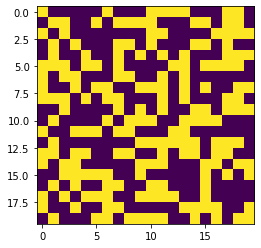

In [4]:
plt.imshow(spins)

## The Energy Function

In [5]:
def calc_energy(spins):
    energy = 0.0
    for i in range(grid_size):
        for j in range(grid_size):
            energy-= spins[i, j] * (spins[i, (j+1)%grid_size] + spins[(i+1)%grid_size, j])
    return energy

In [6]:
calc_energy(spins)

40.0

In [7]:
# Initialize variables to store magnetization and energy
magnetization = []
energy = []

In [8]:
# Run the Metropolis-Hastings algorithm
n_steps = 10000  # number of steps to take
for step in range(n_steps):
    # Choose a random spin
    i = np.random.randint(grid_size)
    j = np.random.randint(grid_size)
    # Calculate the energy of the current configuration
    E_old = calc_energy(spins)
    # Flip the chosen spin
    spins[i, j] = -spins[i, j]
     # Calculate the energy of the new configuration
    E_new = calc_energy(spins)
     # Accept or reject the flip
    if E_new >= E_old:
        # Calculate acceptance probability
        en = E_new - E_old
        p = np.exp(-en / temperature)
        
        # Generate a random number and accept the flip if p > r
        r = np.random.rand()
        if r > p:
            spins[i, j] = -spins[i, j]
    magnetization.append(np.mean(spins))
    energy.append(calc_energy(spins))

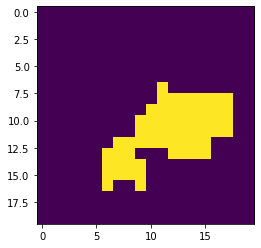

In [9]:
plt.imshow(spins)

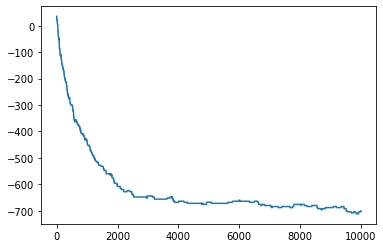

In [10]:
plt.plot(range(n_steps),energy)

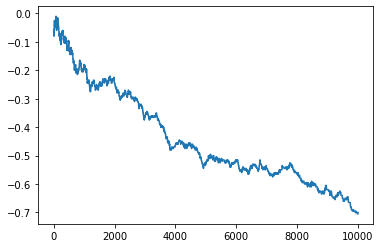

In [11]:
plt.plot(magnetization)